In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# **Importing the dataset from Kaggle**

In [3]:
!kaggle datasets download -d kenjee/z-by-hp-unlocked-challenge-3-signal-processing

 98% 589M/604M [00:06<00:00, 120MB/s]
100% 604M/604M [00:06<00:00, 103MB/s]


In [4]:
# extracting the compessed dataset
from zipfile import ZipFile
dataset = '/content/z-by-hp-unlocked-challenge-3-signal-processing.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

'Forest Recordings'	     Parsed_Not_Capuchinbird_Clips
 kaggle.json		     sample_data
 Parsed_Capuchinbird_Clips   z-by-hp-unlocked-challenge-3-signal-processing.zip


# **Importing the Dependencies**

In [6]:
!pip install tensorflow-io

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 50.5 MB/s eta 0:00:00


In [7]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

# **2.Build data loading function**

## *2.1 Defining paths to files*

In [8]:
CAPUCHIN_FILE = os.path.join('data', '/content/Parsed_Capuchinbird_Clips', 'XC216012-13.wav')
NOT_CAPUCHIN_FILE = os.path.join('data', '/content/Parsed_Not_Capuchinbird_Clips', 'Crickets-chirping-9.wav')
CAPUCHIN_FILE

'/content/Parsed_Capuchinbird_Clips/XC216012-13.wav'

In [9]:
NOT_CAPUCHIN_FILE

'/content/Parsed_Not_Capuchinbird_Clips/Crickets-chirping-9.wav'

## *2.2 Building dataloading funnction*

In [10]:
def load_wav_16k_momo(filename):
  # laod encoded wav file
  file_contents = tf.io.read_file(filename)
  # decode wav (tensors by channels)
  wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
  # remove traling axis
  wav = tf.squeeze(wav, axis=-1)
  sample_rate = tf.cast(sample_rate, dtype=tf.int64)
  # goes from 44100Hz to 16000Hz - ampltude of the audio signal
  wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
  return wav

## *2.3 Plot wave*



In [11]:
wave = load_wav_16k_momo(CAPUCHIN_FILE)
nwave = load_wav_16k_momo(NOT_CAPUCHIN_FILE)

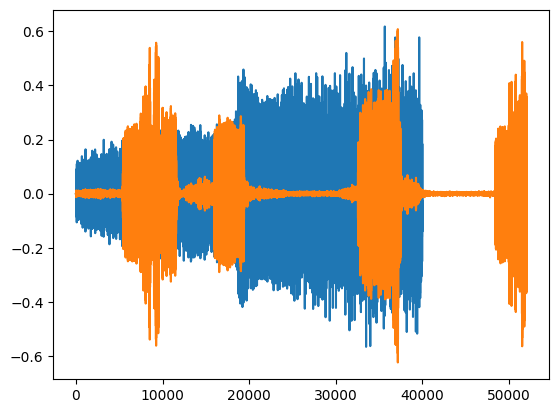

In [12]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

# *3. Create Tensorflow dataset*


## *3.1 Define paths to positive and negative data*

In [13]:
POS = os.path.join( '/content/Parsed_Capuchinbird_Clips')
NEG = os.path.join( '/content/Parsed_Not_Capuchinbird_Clips')

In [14]:
POS

'/content/Parsed_Capuchinbird_Clips'

In [15]:
NEG

'/content/Parsed_Not_Capuchinbird_Clips'

## *3.2 Create tensorflow datasets*

In [16]:
pos = tf.data.Dataset.list_files(POS+'/*.wav')
neg = tf.data.Dataset.list_files(NEG+'/*.wav')

In [17]:
pos.as_numpy_iterator().next()

b'/content/Parsed_Capuchinbird_Clips/XC201990-4.wav'

## *3.3 Add labels and combine positive and negative sample*

In [18]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

In [19]:
positives.as_numpy_iterator().next()

(b'/content/Parsed_Capuchinbird_Clips/XC216012-4.wav', 1.0)

In [20]:
negatives.as_numpy_iterator().next()

(b'/content/Parsed_Not_Capuchinbird_Clips/sparrow-sound-effect-51.wav', 0.0)

In [21]:
data.as_numpy_iterator().next()

(b'/content/Parsed_Capuchinbird_Clips/XC387509-0.wav', 1.0)

In [22]:
data.shuffle(100).as_numpy_iterator().next()

(b'/content/Parsed_Capuchinbird_Clips/XC216010-2.wav', 1.0)

# *4. Detremine average length of capuchin call*

## *4.1 Calculate wave cycle length*

In [23]:
# lenghts = []
# for file in os.listdir(os.path.join('data', '/content/Parsed_Capuchinbird_Clips')):
  # tensor_wave = load_wav_16k_momo(os.path.join('data', '/content/Parsed_Capuchinbird_Clips'))
  # lengths.append(len(tensor_wave))

from pathlib import Path

lengths = []
dir_path = '/content/Parsed_Capuchinbird_Clips'
for file in os.listdir(dir_path):
    file_path = os.path.join(dir_path, file)
    if os.path.isfile(file_path):
        print(f"Processing file: {file_path}")
        tensor_wave = load_wav_16k_momo(file_path)
        print(f"Tensor shape: {tensor_wave.shape}")
        lengths.append(len(tensor_wave))


Processing file: /content/Parsed_Capuchinbird_Clips/XC227471-7.wav
Tensor shape: (40000,)
Processing file: /content/Parsed_Capuchinbird_Clips/XC395129-5.wav
Tensor shape: (48000,)
Processing file: /content/Parsed_Capuchinbird_Clips/XC216012-14.wav
Tensor shape: (48000,)
Processing file: /content/Parsed_Capuchinbird_Clips/XC114132-6.wav


Tensor shape: (56000,)
Processing file: /content/Parsed_Capuchinbird_Clips/XC600460-3.wav
Tensor shape: (48000,)
Processing file: /content/Parsed_Capuchinbird_Clips/XC216012-5.wav
Tensor shape: (48000,)
Processing file: /content/Parsed_Capuchinbird_Clips/XC178168-1.wav
Tensor shape: (48000,)
Processing file: /content/Parsed_Capuchinbird_Clips/XC9221-2.wav
Tensor shape: (56000,)
Processing file: /content/Parsed_Capuchinbird_Clips/XC433953-8.wav
Tensor shape: (32000,)
Processing file: /content/Parsed_Capuchinbird_Clips/XC600460-1.wav
Tensor shape: (48000,)
Processing file: /content/Parsed_Capuchinbird_Clips/XC520626-3.wav
Tensor shape: (56000,)
Processing file: /content/Parsed_Capuchinbird_Clips/XC216012-7.wav
Tensor shape: (56000,)
Processing file: /content/Parsed_Capuchinbird_Clips/XC3776-0.wav
Tensor shape: (48000,)
Processing file: /content/Parsed_Capuchinbird_Clips/XC216012-2.wav
Tensor shape: (56000,)
Processing file: /content/Parsed_Capuchinbird_Clips/XC46241-2.wav
Tensor shape: (

In [24]:
lengths

[40000,
 48000,
 48000,
 56000,
 48000,
 48000,
 48000,
 56000,
 32000,
 48000,
 56000,
 56000,
 48000,
 56000,
 56000,
 56000,
 56000,
 32000,
 56000,
 48000,
 64000,
 56000,
 48000,
 64000,
 56000,
 72000,
 56000,
 40000,
 56000,
 55999,
 48000,
 56000,
 64000,
 56000,
 56000,
 48000,
 32000,
 64000,
 56000,
 56000,
 64000,
 64000,
 40000,
 56000,
 48000,
 64000,
 64000,
 64000,
 55999,
 56000,
 40000,
 56000,
 56000,
 48000,
 64000,
 40000,
 64000,
 40000,
 48000,
 40000,
 56000,
 64000,
 56000,
 48000,
 48000,
 48000,
 48000,
 48000,
 64000,
 56000,
 56000,
 56000,
 72000,
 56000,
 56000,
 56000,
 64000,
 48000,
 64000,
 64000,
 64000,
 32000,
 56000,
 56000,
 64000,
 48000,
 56000,
 40000,
 48000,
 56000,
 56000,
 56000,
 56000,
 56000,
 64000,
 48000,
 48000,
 56000,
 56000,
 56000,
 56000,
 48000,
 64000,
 48000,
 56000,
 56000,
 56000,
 64000,
 48000,
 56000,
 56000,
 48000,
 56000,
 56000,
 56000,
 64000,
 40000,
 48000,
 64000,
 64000,
 40000,
 40000,
 64000,
 56000,
 64000,


## *4.2 Calculate Mean, Min and Max*

In [25]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=54156>

In [26]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [27]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=80000>

# *5 Build preprocessing function to convert to spectrogram*

## *5.1 Build preprocessing function*

In [33]:
def preprocess(file_path, label):
  wav = load_wav_16k_momo(file_path)
  wav = wav[:48000]
  zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
  wav = tf.concat([zero_padding, wav], 0)
  spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
  spectrogram = tf.abs(spectrogram)
  spectrogram = tf.expand_dims(spectrogram, axis=2)
  return spectrogram, label

## *5.2 test out the function and viz the spectogram*

In [37]:
filepath, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [38]:
spectrogram, label = preprocess(filepath, label)

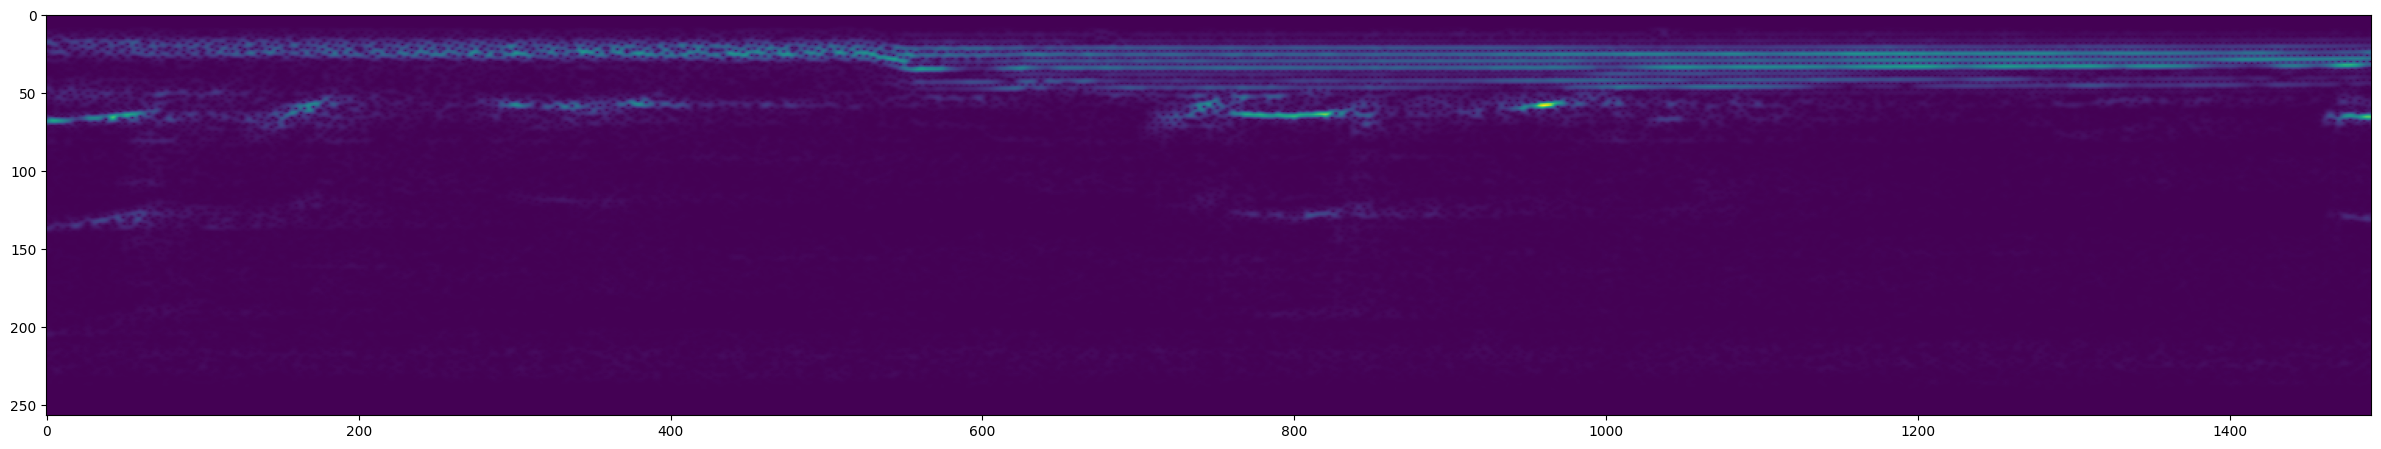

In [39]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

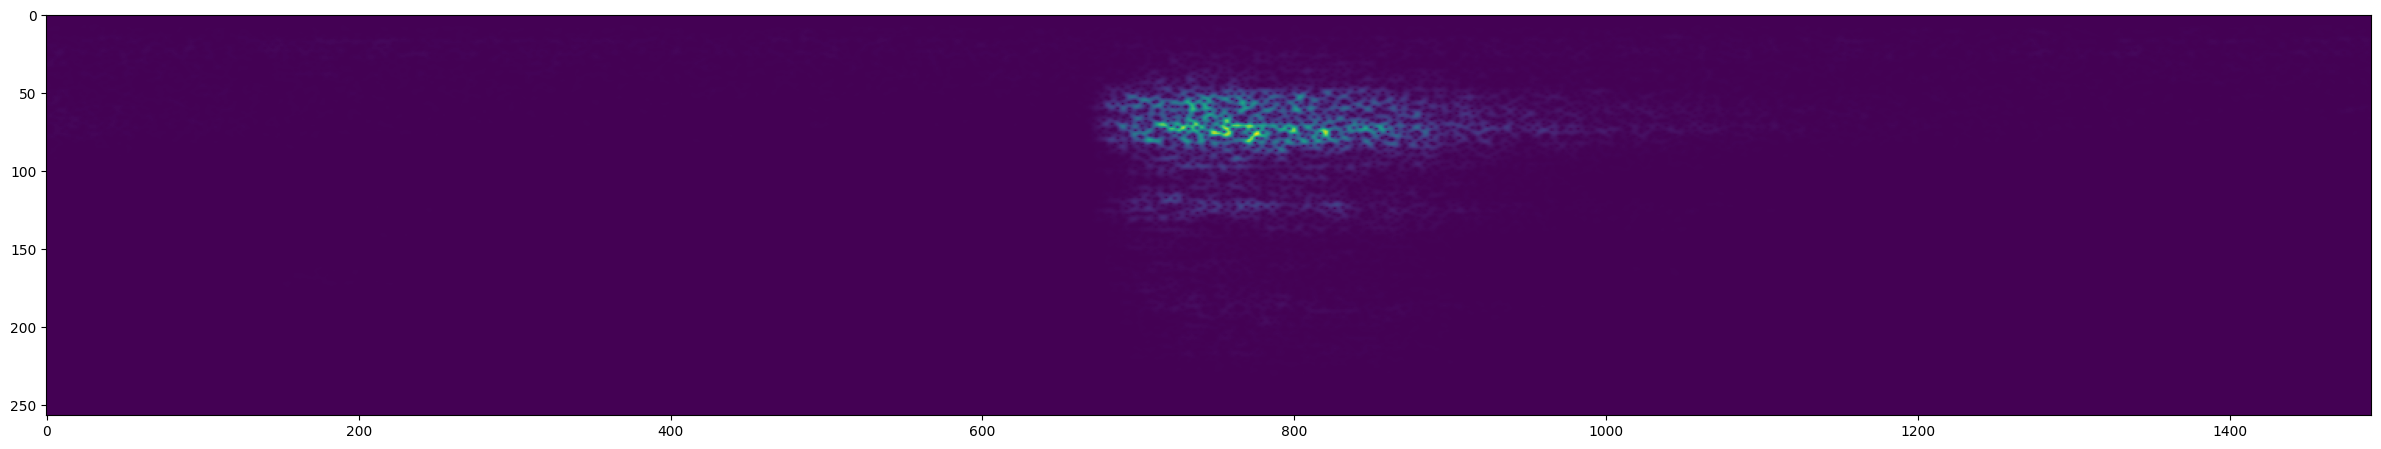

In [47]:
filepath, label = negatives.shuffle(buffer_size=10000).as_numpy_iterator().next()
spectrogram, label = preprocess(filepath, label)
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

# *6. Create training and testing partitions*

## *6.1 Create a tensorflow data pipeline*

In [48]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

## *6.2 Split into training and testing partitions*

In [49]:
len(data)*.7

35.699999999999996

In [50]:
train = data.take(36)
test = data.skip(36).take(15)

## *6.3 Test one batch*

In [53]:
samples, labels = train.as_numpy_iterator().next()

In [56]:
samples.shape

(16, 1491, 257, 1)

# *7. Build deep learning model*

## *7.1 Load tensorflow dependencies*